### Exercicio 3 - Regime Transiente condução em uma parede plana

Dados: 
- comprimento da parede = 0,5m
- T(0) = 3°C
- T(n) = 17°C
- T(inicial) = 7°C
- k1 = pq/k = 0,00023


In [118]:
# 10 nós inicial
import numpy as np 
import matplotlib.pyplot as plt

L = 0.5
alfa = 0.00023
T0 = 3
Ts = 17
Tinicial = 7

Nx = 100
Nt = 100
tf = 400

t = np.linspace(0,tf,Nt)    
x = np.linspace(0,L,Nx)
dt, dx = t[1] - t[0], x[1] - x[0]

s = alfa*dt/(dx*dx)

print(dt,'\n',x)

4.040404040404041 
 [0.         0.00505051 0.01010101 0.01515152 0.02020202 0.02525253
 0.03030303 0.03535354 0.04040404 0.04545455 0.05050505 0.05555556
 0.06060606 0.06565657 0.07070707 0.07575758 0.08080808 0.08585859
 0.09090909 0.0959596  0.1010101  0.10606061 0.11111111 0.11616162
 0.12121212 0.12626263 0.13131313 0.13636364 0.14141414 0.14646465
 0.15151515 0.15656566 0.16161616 0.16666667 0.17171717 0.17676768
 0.18181818 0.18686869 0.19191919 0.1969697  0.2020202  0.20707071
 0.21212121 0.21717172 0.22222222 0.22727273 0.23232323 0.23737374
 0.24242424 0.24747475 0.25252525 0.25757576 0.26262626 0.26767677
 0.27272727 0.27777778 0.28282828 0.28787879 0.29292929 0.2979798
 0.3030303  0.30808081 0.31313131 0.31818182 0.32323232 0.32828283
 0.33333333 0.33838384 0.34343434 0.34848485 0.35353535 0.35858586
 0.36363636 0.36868687 0.37373737 0.37878788 0.38383838 0.38888889
 0.39393939 0.3989899  0.4040404  0.40909091 0.41414141 0.41919192
 0.42424242 0.42929293 0.43434343 0.4393939

In [119]:
A = np.zeros((Nx,Nx+1)) # Nx + 1 pois a última coluna da linha é a temperatura (é possivel fazer diferente)
T = np.zeros((Nt,Nx))

T[0][:] =Tinicial             #condição inicial no tempo zero
T[0][-1] = Ts           #condição de contorno T(n)
T[0][0] = T0

A[0,0] = 1
A[-1][-2] = 1

for j in range(1,Nt):
    
    for i in range(1,Nx-1):
        A[i][i-1] = -s
        A[i][i] = 1 + 2*s
        A[i][i+1] = -s

for i in range(1,Nx-1):
        A[i][-1] = T0

A[-1][-1] = Ts

print('Matriz A','\n',A,2*'\n','Matriz temperatura','\n',T)

Matriz A 
 [[  1.      0.      0.    ...   0.      0.      0.   ]
 [-36.432  73.864 -36.432 ...   0.      0.      3.   ]
 [  0.    -36.432  73.864 ...   0.      0.      3.   ]
 ...
 [  0.      0.      0.    ... -36.432   0.      3.   ]
 [  0.      0.      0.    ...  73.864 -36.432   3.   ]
 [  0.      0.      0.    ...   0.      1.     17.   ]] 

 Matriz temperatura 
 [[ 3.  7.  7. ...  7.  7. 17.]
 [ 0.  0.  0. ...  0.  0.  0.]
 [ 0.  0.  0. ...  0.  0.  0.]
 ...
 [ 0.  0.  0. ...  0.  0.  0.]
 [ 0.  0.  0. ...  0.  0.  0.]
 [ 0.  0.  0. ...  0.  0.  0.]]


In [120]:
for j in range(1,Nt):
        
    for i in range(1,Nx-1):         # preenche novamente com os dados da matriz
        A[i][i-1] = -s
        A[i][i] = 1 + 2*s
        A[i][i+1] = -s

    A[0][-1] = T0
    A[-1][-1] = Ts
    
    
    for i in range(1,Nx-1):         # zera a parte de baixo da matriz tridiagonal
        aux = A[i][i-1]
        A[i] = A[i]/aux
        A[i] = A[i] - A[i-1]
        aux = A[i][i]
        A[i] = A[i] / aux

    for i in range(-2,-Nx,-1):      # zera a parte de cima da matriz tridiagonal
        aux = A[i][i]
        A[i] = A[i]/aux
        A[i] = A[i] - A[i+1]
        aux = A[i][i-1]
        A[i] = A[i]/aux
        
    for i,lista in enumerate(A):    # passa os resultados da matriz A para a matriz T
        T[j][i] = (lista[-1])
        
print(T)

[[ 1.          0.          0.         ...  0.          0.
   3.        ]
 [-0.          1.         -0.         ... -0.         -0.
   3.13342679]
 [-0.         -0.          1.         ... -0.         -0.
   3.26686161]
 ...
 [-0.         -0.         -0.         ... -0.         -0.
  16.70120358]
 [-0.         -0.         -0.         ...  1.         -0.
  16.85059777]
 [ 0.          0.          0.         ...  0.          1.
  17.        ]]


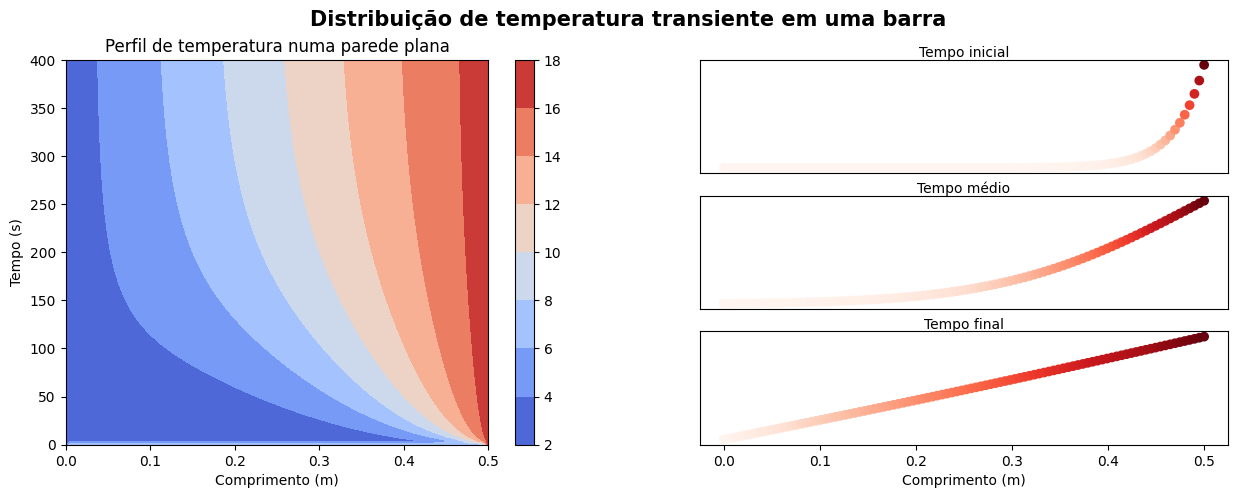

In [122]:
mosaico = "AB;AC;AD"
fig = plt.figure(figsize=(15, 5))
axs = fig.subplot_mosaic(mosaico)

# Perfil de temperatura
chart = axs['A'].contourf(x,t,T,cmap='coolwarm')
axs['A'].set_title('Perfil de temperatura numa parede plana')
axs['A'].set_ylabel('Tempo (s)')
axs['A'].set_xlabel('Comprimento (m)')

axs['B'].scatter(x,T[1],c=T[1],cmap='Reds')
axs['B'].set_title('Tempo inicial',size=10,pad=-2)
axs['B'].tick_params(axis='x', length=0)
axs['B'].set_xticks([])
axs['B'].set_yticks([])
  
i = 15
axs['C'].scatter(x,T[i],c=T[i],cmap='Reds')
axs['C'].set_title(f'Tempo médio',size=10,pad=-2)
axs['C'].tick_params(axis='y', length=0)
axs['C'].tick_params(axis='x', length=0)
axs['C'].set_xticks([])
axs['C'].set_yticks([])

axs['D'].scatter(x,T[-1],c=T[-1],cmap='Reds')
axs['D'].set_title(f'Tempo final',size=10,pad=-2)
axs['D'].set_xlabel('Comprimento (m)')
axs['D'].tick_params(axis='y', length=0)
axs['D'].set_yticks([])

fig.suptitle('Distribuição de temperatura transiente em uma barra',weight='bold',size = 15)
fig.colorbar(chart)